James Ho
Olivia Seitelman

## Question?
### How would the world population be different today if the Green Revolution had never occurred?
### How would the growth rate have differed?

## Model:
State - starting population in 1950/60, actual population from 1950/60 to present, year

Action - population changes by a certain amount each year

Parameters - growth rate

Metric - the absolute and percentage difference between model and prediction of the population in 2015

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
import pandas
import numpy as np
from numpy import genfromtxt

In [2]:
# Import the .csv files of the population data
my_data = pandas.read_csv('WorldPopData.csv', sep=',');

In [3]:
# Will modify this function later to plot the model and the data
def plot_results(modelPop, realPop, years, title):
    """Plot the estimates and the model.
    
    modelPop: the predicted population
    realPop: the population from data
    years: the time axis of the plot
    title: string
    """
    plot(years, modelPop, ':' , label='Model')
    plot(years, realPop, label='Data')    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [4]:
# Will modify this function later to plot the model
def plot_one_result(realPop, mod1, mod2, mod3, years, title, X_label, Y_Label):
    """Plot the estimates and the model.
    
    realPop: the actual vaules
    mod1, mod2, mod3: the predictions from the three different models used.
    years: the time axis of the plot
    title: string
    X_label: string
    Y_label: string
    Label: string
    """
    plot(years, realPop, label='Real Growth Rate')
    plot(years, mod1, ':', label='Proportional GR')
    plot(years, mod2, ':', label='Quadratic GR')
    plot(years, mod3, ':', label='Polynomial GR')
    decorate(xlabel=X_label, 
             ylabel=Y_Label,
             title=title)

In [5]:
# Cut the data to start from 1900
# Population will be in billions
year1900 = my_data.year.values[11900:12018];
pop1900 = my_data.WorldPop.values[11900:12018]/10**9;

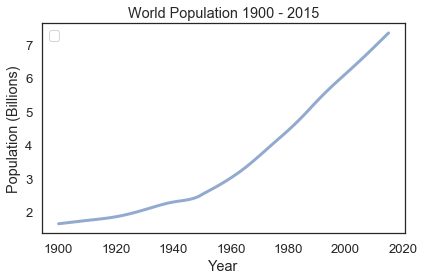

In [6]:
# Test plotting the data
plot(year1900, pop1900)
decorate(title = "World Population 1900 - 2015",
        xlabel = "Year",
        ylabel = "Population (Billions)")

The world population took off around 1950-1960, and this large population growth was due to increasing birth rates and decreased death rates that were sustained by the Green Revolution- an agricultural movement that increased food availability around the world, specifically in poorer countries.

In [7]:
# Calculate the total average growth rate
t_0 = year1900[0]
t_end = year1900[-1]
elapsed_time = t_end - t_0

p_0 = pop1900[0]
p_end = pop1900[-1]
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time;

In [8]:
# Create model System object
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0.014,
                    beta = -0.003,
                    gamma = -0.00005);

In [9]:
# Define run simulation function
def run_sim(system, update_func):
    """Simulate the system using any update function
    system: System object
    update_func: function that computes the population next year
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], system)
    return results

We first tried a proportional growth model where the population is based on birth and death rate

In [10]:
# Update function: Proportional growth
def update_proportional(pop, system):
    """update function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    result = births - deaths + pop
    return result

Run the simulation with the proportional update function. Store the results in a variable. Display plot.

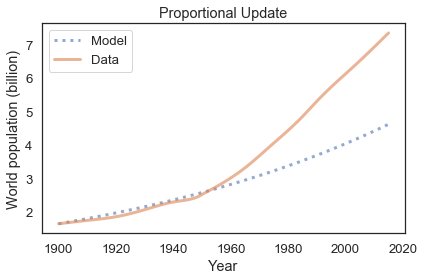

In [11]:
population_prop = run_sim(modelSystem, update_proportional);
plot_results(population_prop, pop1900, year1900, "Proportional Update")

The model matches up with the world population the beginnign of the Green Revolution and at key points before. It does not match around 1920 or the mid 1940's, but that is to be expected because the model does not take into account the World Wars.

Then, we tried a quadratic growth model.

In [12]:
# Update function: Quadratic growth
def update_quadratic(pop, system):
    """udpate function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    netGrowth = system.alpha * pop + system.beta * pop**2
    result = netGrowth + pop
    return result

In [13]:
# Model System object
# Best alpha and beta are 0.022, -0.007
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0.022,
                    beta = -0.007,
                    gamma = -0.00008);

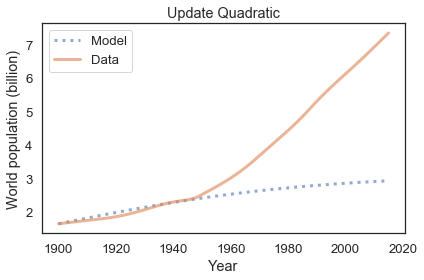

In [14]:
# Run the simulation using the quadtratic update function and plot the results
population_quad = run_sim(modelSystem, update_quadratic);
plot_results(population_quad, pop1900, year1900, "Update Quadratic")

This model matches up with the actual population right before the Green Revolution as well, but it is much farther off from the real data before. Unlike the proportional growth model, the growth rate decreases over time.

In [15]:
# Update function: polynomial growth
def update_poly(pop, system):
    """udpate function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    netGrowth = system.alpha * pop + system.beta * pop**2 + system.gamma * pop**3
    result = netGrowth + pop
    return result

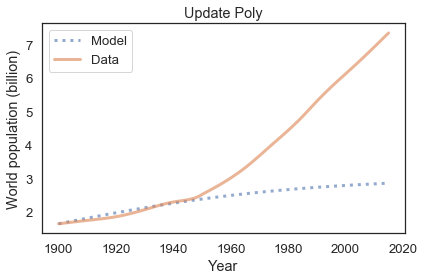

In [16]:
population_poly = run_sim(modelSystem, update_poly);
plot_results(population_poly, pop1900, year1900, "Update Poly")

The polynomial model yeilds results similar to the quadratic model.

Then, we looked at the growth rates over time in each of the different models.

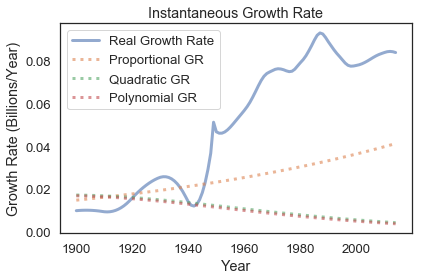

In [17]:
growthRate1900 = np.diff(pop1900);
modelGrowthRate_prop = np.diff(population_prop);
modelGrowthRate_quad = np.diff(population_quad);
modelGrowthRate_poly = np.diff(population_poly);
plot_one_result(growthRate1900, modelGrowthRate_prop, modelGrowthRate_quad, modelGrowthRate_poly, year1900[:-1], "Instantaneous Growth Rate", "Year", "Growth Rate (Billions/Year)")

We see that the growth rate for the proportional model increases over the years instead of decreasing like that of the quadratic and polynomial models. It is more representative of the real population, so we will base our conclusions off the proportional model.

## Results

Looking at the graphs, we can determine the absolute and percentage difference of the population between the model and the data.

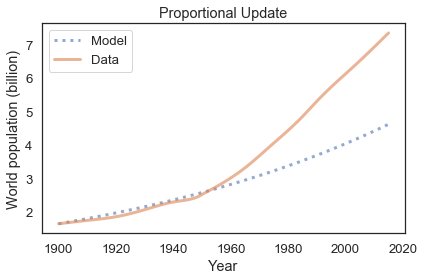

In [18]:
population_prop = run_sim(modelSystem, update_proportional);
plot_results(population_prop, pop1900, year1900, "Proportional Update")

The real population in 2015 was 7.35 billion, whereas the projected population in the model was 4.63 billion. The absolute difference in 2015 is 2.72 billion people. 

The world population grew by 2.4% from 1960 to 2015. wheras the model population grew by a percentage of only 1.5%.

## Interpretation

Looking at the growth rates from the "Instantaneous Growth Rate" graph above, we notice that the average growth rate of the real population increases. The average growth rates of the quadratic and polynomial model decrease while the proportional average growth rate increases. Because of this, it is reasonable to measure the results of the proportional model. 

The growth rate of the real world population started to increase around 1960, which can be partially attributed to the Green Revolution. Our proportional model lacks this spike, which results in a much lower world population.

In [19]:
# Test code for learning gradient descent

In [20]:
def gradient_descent(runs, learning_rate, update_func):
    """Runs the run_sim function and updates the model system parameters
    
    runs: number of iterations of gradient descent
    learning_rate: size of descent steps per iteration
    returns: the final mean squared error  
    prints: the mean squared error for each run
    returns: an array containing the error over iterations
    """
    newWeight = 0;
    newWeight2 = 0;
    newBias = 0;
    error_log = SweepSeries()
    
    for i in range(runs):
        population = run_sim(modelSystem, update_func)
        newParams = update_weights(pop1900, population, newWeight, newWeight2, newBias, learning_rate);
        newWeight = newParams[0];
        newWeight2 = newParams[1];
        newBias = newParams[2];
        modelSystem.alpha = newWeight
        modelSystem.beta = newWeight2
        modelSystem.gamma = newBias
        error = cost_func(pop1900, population);
        print("Iteration: ", i, ", MS Error: ", error);
        error_log[i] = error;
        
    plot_results(population, pop1900, year1900, "Plot After Gradient Descent")
    print("Final error: ", error)
    return error_log

In [21]:
def cost_func(realPop, predictions):
    """calcaulate the mean squared error between the predictions and the actual
    
    realPop: the actual population vector
    predictions: the vector that the simulation generates
    returns: the mean squared error
    """
    n = len(realPop)
    total_error = 0.0
    for i in range(n):
        total_error += (realPop[i] - predictions[i+1900])**2 
    return total_error / n

The partial derivatives used to update the weights are incorrect 

In [22]:
def update_weights(realPop, predictions, weight, weight2, bias, learning_rate):
    """Update the weights to minimize the error
    
    realPop: actual population
    predictions: the current predicted value of population
    weight: parameter that is being optimized
    bias: another parameter that is being optimized
    learning_rate: the step size of each iteration
    """
    weight_deriv = 0
    weight2_deriv = 0
    bias_deriv = 0
    n = len(realPop)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2 * (realPop[i] - (predictions[i+1900]))
        
        # Don't know how to find out how each weight contributes to the predictions
        # Another derivative for second weight parameter
        weight2_deriv += -2 * (realPop[i] - (predictions[i+1900]))

        # -2(y - (mx + b))
        bias_deriv += -2*(realPop[i] - (predictions[i+1900]))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / n) * learning_rate
    weight2 -= (weight2_deriv / n) * learning_rate
    bias -= (bias_deriv / n) * learning_rate

    return weight, weight2, bias

In [23]:
# Model System object
modelSystem_GD = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0,
                    beta = 0,
                    gamma = 0,);

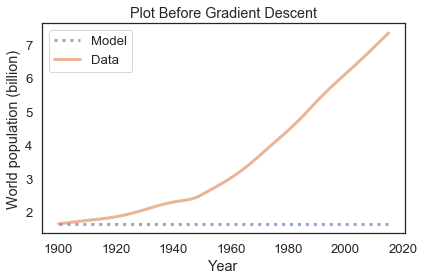

In [24]:
# Start off with bad fit
modelSystem_GD.alpha = 0
modelSystem_GD.beta = 0
population = run_sim(modelSystem_GD, update_quadratic)
plot_results(population, pop1900, year1900, "Plot Before Gradient Descent")

Iteration:  0 , MS Error:  3.3373408256715322
Iteration:  1 , MS Error:  6.635525005399547
Iteration:  2 , MS Error:  6.404876489724779
Iteration:  3 , MS Error:  6.16924872272886
Iteration:  4 , MS Error:  5.928878473792093
Iteration:  5 , MS Error:  5.684066491502915
Iteration:  6 , MS Error:  5.435184641189758
Iteration:  7 , MS Error:  5.18268298680279
Iteration:  8 , MS Error:  4.927096537853881
Iteration:  9 , MS Error:  4.669051302166547
Iteration:  10 , MS Error:  4.409269198504369
Iteration:  11 , MS Error:  4.148571294858046
Iteration:  12 , MS Error:  3.8878787563332358
Iteration:  13 , MS Error:  3.6282108226877376
Iteration:  14 , MS Error:  3.370679104740312
Iteration:  15 , MS Error:  3.1164775094527326
Iteration:  16 , MS Error:  2.866867195686339
Iteration:  17 , MS Error:  2.6231561459596717
Iteration:  18 , MS Error:  2.3866732287513166
Iteration:  19 , MS Error:  2.158737025688706
Iteration:  20 , MS Error:  1.9406201968821473
Iteration:  21 , MS Error:  1.733510722

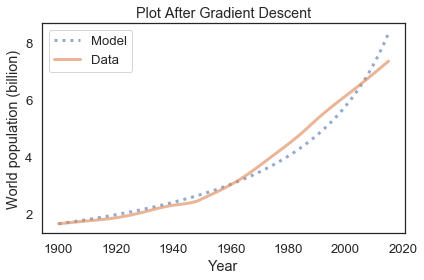

In [25]:
# Run gradient descent and log the progress over iterations
error_log = gradient_descent(50, 0.00004, update_quadratic);